## Horas capacitação x Área
---
Analisar o total de horas investidas em capacitação por área

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df_rh = pd.read_excel("rh.xlsx")
df_rh.head()

,Centro de Responsabilidade,Cod centro,Nome conta 1º nível,Cod conta 1º nível,Nome conta 2º nível,Cod conta 2º nível,Nome conta 3º nível,Área,Colaborador,Data da Admissão,Data da Demissão,Matrícula,Salário,Curso,Pesquisa de Clima Organizacional,Horas de Capacitação,Ano,Mês
0,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Daniel Alves (Barcelona),2007-05-03,NaN,2234,1716.54,Libras,Sim,60,2022,MARÇO
1,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Maicon (Roma),2007-05-03,NaN,2235,2129.70,-,Não,-,2022,-
2,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Marcelo (Real Madrid),2008-03-02,NaN,2236,2129.70,CIPA,Sim,20,2022,JANEIRO
3,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Maxwell (PSG),2016-03-02,NaN,2237,2129.70,-,Não,-,2022,-
4,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Bernard (Shakhtar),2020-06-03,NaN,2238,1999.13,Administração de Conflitos,Sim,10,2022,FEVEREIRO


In [17]:
def grafico_investimento_capacitacao(df):
    df_copy = df.copy()
    df_copy["Horas de Capacitação"] = pd.to_numeric(df_copy["Horas de Capacitação"].replace("-", 0))
    resumo = df_copy.groupby("Área")["Horas de Capacitação"].sum().reset_index()

    plt.figure(figsize=(9,6), facecolor="lightgray")
    ax = plt.gca()
    ax.set_facecolor("whitesmoke")

    bars = plt.bar(resumo["Área"], resumo["Horas de Capacitação"], color="teal", edgecolor="black")

   
    plt.title("Investimento em Capacitação por Área", fontsize=16, color="darkblue")
    plt.xlabel("Área da Empresa", fontsize=12, color="black")
    plt.ylabel("Total de Horas", fontsize=12, color="black")
    plt.xticks(rotation=30, fontsize=10)

    # Adicionar valores em cima das barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 3, int(yval),
                 ha='center', va='bottom', fontsize=10, color="black")

    plt.tight_layout()
    plt.savefig('graficos/investimento_geral_por_area')
    plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2416\2927920341.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy["Horas de Capacitação"] = pd.to_numeric(df_copy["Horas de Capacitação"].replace("-", 0))


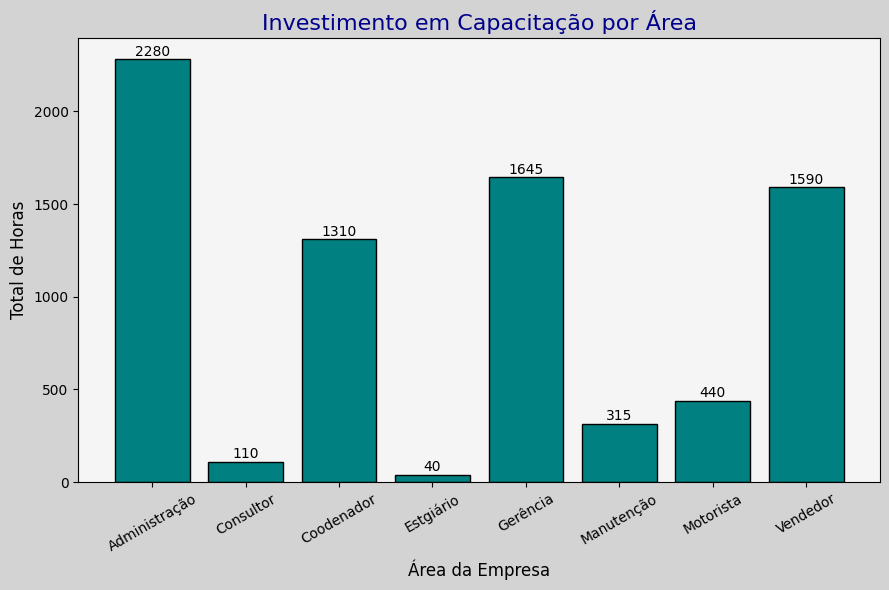

In [18]:
grafico_investimento_capacitacao(df_rh)

### Análise por colaborador
---
Algumas áreas podem ter mais colaboradores do que outras, então é justo fazer uma análise comparativa da média por colaborador em cada área

In [15]:
def grafico_percentual(df):
    df_copy = df.copy()
    df_copy["Horas de Capacitação"] = pd.to_numeric(df_copy["Horas de Capacitação"].replace("-", 0))

    # Agrupar por área e calcular a média de horas por colaborador
    resumo_percentual = df_copy.groupby("Área").agg({
        "Horas de Capacitação": "sum",
        "Colaborador": "count"
    }).reset_index()

    resumo_percentual["Média Horas/Colaborador"] = (
        resumo_percentual["Horas de Capacitação"] / resumo_percentual["Colaborador"]
    )

    # --- Gráfico: Percentual (média por colaborador) ---
    plt.figure(figsize=(9,6), facecolor="lightgray")
    ax = plt.gca()
    ax.set_facecolor("whitesmoke")

    bars = plt.bar(
        resumo_percentual["Área"],
        resumo_percentual["Média Horas/Colaborador"],
        color="orange",
        edgecolor="black"
    )

    plt.title("Investimento em Capacitação por Área (Média por Colaborador)",
              fontsize=16, color="darkred")
    plt.xlabel("Área da Empresa", fontsize=12)
    plt.ylabel("Média de Horas por Colaborador", fontsize=12)
    plt.xticks(rotation=30, fontsize=10)

    # Adicionar valores sobre as barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2,
                 yval + 0.5,
                 str(round(yval, 1)),
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.savefig('graficos/investimento_medio_por_colaborador.png')  
    plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_2416\1225398161.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy["Horas de Capacitação"] = pd.to_numeric(df_copy["Horas de Capacitação"].replace("-", 0))


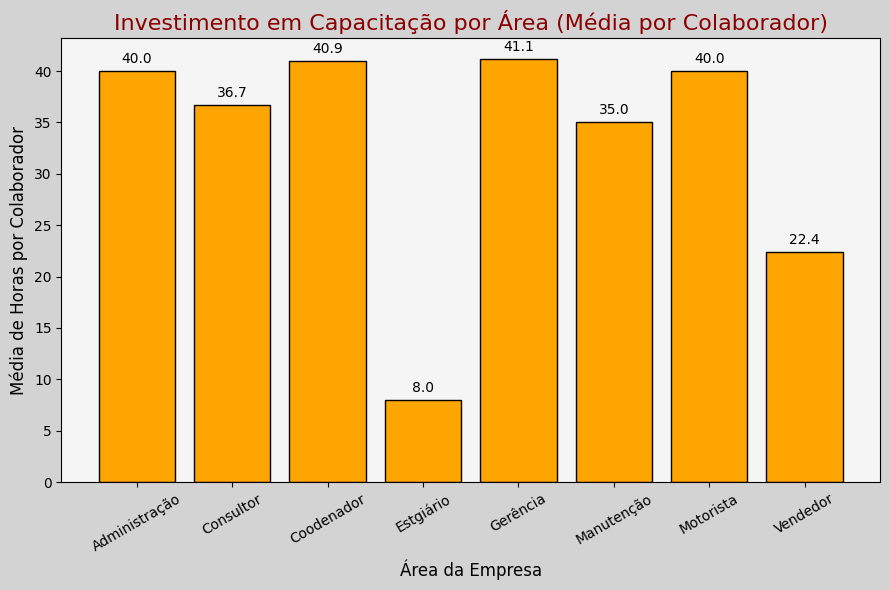

In [16]:
grafico_percentual(df_rh)

## Comparação
---
**Análise Absoluta**
O primeiro gráfico mostra o volume total de horas de capacitação que cada área recebeu.
Esse tipo de análise evidencia onde a empresa concentrou mais recursos de treinamento em termos absolutos.
Áreas maiores, com mais colaboradores, naturalmente aparecem com números mais altos, pois têm mais pessoas acumulando horas.

**Análise Percentual (Média de Horas por Colaborador)**

O segundo gráfico mostra a média de horas de capacitação por colaborador em cada área.
Aqui a visão muda: mesmo áreas menores podem se destacar se, proporcionalmente, seus colaboradores receberam mais atenção em treinamentos.
Isso revela a intensidade do investimento em capacitação, independente do tamanho da área.